In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [9]:
df = pd.read_excel('Project 2_2023.xlsx')

In [11]:
df['Date'] = pd.to_datetime(df['Date'])

In [24]:
df

,Date,Income,Outcome,Balance
0,2017-01-09,1.343028,1.487865,-0.155904
1,2017-01-10,1.068610,1.194182,-0.125572
2,2017-01-11,0.944429,0.936663,0.007767
3,2017-01-12,1.672202,0.875379,0.800391
4,2017-01-13,0.955924,0.975645,-0.019721
...,...,...,...,...
1538,2021-03-27,0.000000,0.000000,0.000000
1539,2021-03-28,0.000000,0.000000,0.000000
1540,2021-03-29,2.356883,3.370738,-1.017679
1541,2021-03-30,2.317382,2.567554,-0.259687


В рамках проекта №2 требуется реализовать автоматизированный пайплайн для прогнозирования значений верменного ряда на следуюбщий день.
Ряды представляют из себя срезы в обозначенные моменты времени притоков, оттоков и сальдо показателя, связанного с потоками ликвидности Банка
Прогноз требуется строить для значения сальдо (разнинцы между притоками и оттоками)
Заказчик модели высказал пожелание, чтобы ошибка прогноза составляла не более 0.42 в абсолютном значении


**Требования к модели:**
1. Выбор оптимизируемой метрики должен быть основан на потребностях бизнеса
2. Модель может использовать внешние факторы (см подсказки)
3. Модель должна иметь модуль отбора признаков. Метод отбора должен быть болеее стабильным относительно альтернатив. Сравнение должно быть проведено минимум с одним методом из каждой категории: встроенные, оберточные и фильтрационные. При этом как минимум одна из альтернатив должа исследовать нелинейную зависимость.
4. Модель должна втоматически подбирать гиперпараметры, оптимизируя целевую метрику
5. Для модели должна быть подобрана частота калиброки, если модель калибруется долго, и проверена ее достаточность
6. Блоки должны быть подписаны и кратко описаны (чем руководствовались при реализации, как работает)
7. Модель должна автоматически дообучаться. Все модули должны работать без ручных корректировок. Выбор периода для дообучения должен быть обоснован.
8. В модели должен быть модуль выявления разладки для подачи сигнала о возможной необходимости переключения на на ручное управление процессом/внеплановое дообучение

**Подсказки:**
- Можно использовать факторы, сконструированные из таргета (лаги, средние и т.п.)
- Могут помочь макроэкономические факторы
- Могут помочь даты налоговых дней

**Описание бизнес-процесса:**
1. Прогнозная величина позволяет установить сальдо поступлений и списаний за день.
2. На основании прогноза позиционер (управляет ликвидностью) принимает решение о выделении средств на размещение на рынке деривативов для получения дополнительной маржи (доходность считать примерно ключ+0.5%)
3. В случае, если на конец дня образуется профицит ликвидности, его можно разместить в ЦБ по overnight ставке, равной ключу-0.9%
4. В случае, если на конец дня образуется дефицит ликвидности, его можно покрыть за счет займа по overnight ставке, равной ключ+1%

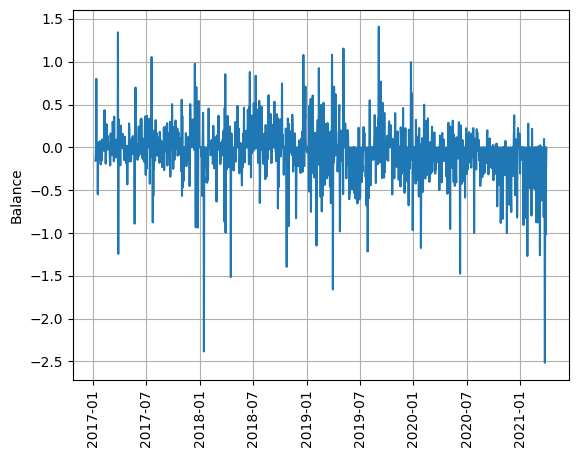

In [28]:
plt.plot(df['Date'], df['Balance'])
plt.xticks(rotation = 90)
plt.ylabel('Balance')
plt.grid()

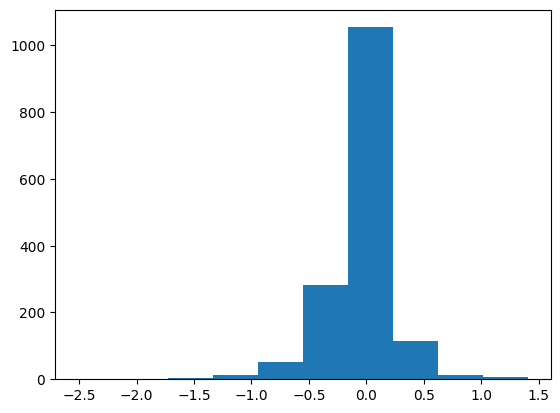

In [30]:
plt.hist(df['Balance']);

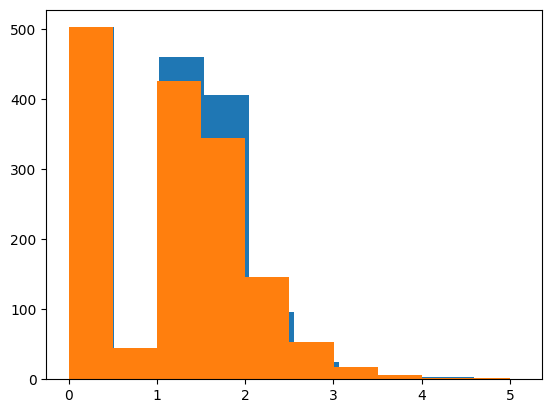

In [33]:
plt.hist(df['Income'])
plt.hist(df['Outcome']);